In [3]:
import matplotlib.pyplot as plt
import numpy as np

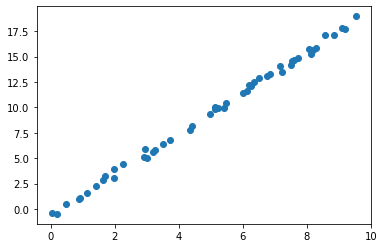

In [49]:
r=np.random.RandomState(10)
x=10*r.rand(50)
y=2*x-1+r.rand(50)
plt.scatter(x,y)

In [32]:
from sklearn.linear_model import LinearRegression as L

In [34]:
model=L(fit_intercept=True)
model

LinearRegression()

In [39]:
X=x[:,np.newaxis]
X.shape

(50, 1)

In [99]:
model.fit(X,y)
print(model.intercept_,model.coef_)

-0.5864561853862273 [2.0110247]


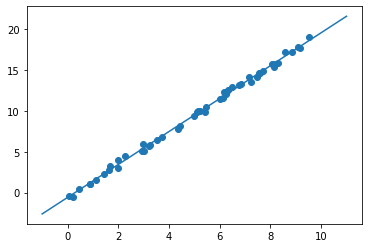

In [52]:
xfit=np.linspace(-1,11)
yfit=model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

## K means

In [73]:
import pandas as pd
data=pd.read_csv('data1.csv')

In [55]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
data=data.iloc[:,3:].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


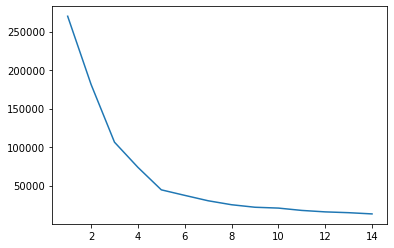

In [84]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)

In [94]:
km=KMeans(n_clusters=5,random_state=0)
ykm=km.fit_predict(data)
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [101]:
from sklearn.datasets import load_digits

In [110]:
digits=load_digits()

In [119]:
digits.data.shape
kmean=KMeans(n_clusters=10,random_state=0)
cluster=kmean.fit_predict(digits.data)
kmean.cluster_centers_.shape

(10, 64)

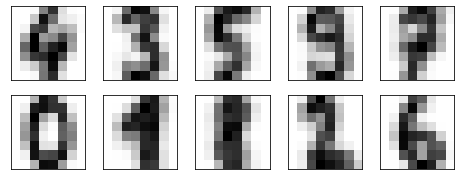

In [120]:
fig,ax=plt.subplots(2,5,figsize=(8,3))
center=kmean.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,center):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation="nearest",cmap=plt.cm.binary)